# Aufgabe 2: Python Script erstellen

#### Autorin: Britta Lelgemann

### Vorbereitung der Datenanalyse

In [76]:
# Import des Packages "urllib" und des Moduls "request": 
import urllib.request
# Import von Pandas und Festlegung eines Alias: 
import pandas as pd 
# Import des Packages "matplotlib" und des Moduls "pyplot"
import matplotlib.pyplot as plt

In [90]:
# Angabe der URls, wo die Daten zu finden sind: 
url_2019 = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000"
url_2020 = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2020&$limit=10000" 
# Erstellen von Dateien, in die die Daten gespeichert werden sollen & Festlegung von Variablen:
checkouts_file_2019 = "checkouts2019.csv"
checkouts_file_2020 = "checkouts2020.csv"

In [92]:
# Download der Daten mit der Funktion "urlretrieve" aus der urllib-library und dem Modul "request":
urllib.request.urlretrieve(url_2019, checkouts_file_2019)

('checkouts2019.csv', <http.client.HTTPMessage at 0x24af45040c8>)

In [93]:
urllib.request.urlretrieve(url_2020, checkouts_file_2020)

('checkouts2020.csv', <http.client.HTTPMessage at 0x24af4504b48>)

In [96]:
# Die Daten mit Pandas ausgeben und diesen Befehl in einer Variablen ablegen:
checkouts_2019 = pd.read_csv(checkouts_file_2019)
checkouts_2020 = pd.read_csv(checkouts_file_2020)

In [80]:
# Anzeigen lassen:
checkouts_2019

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,AUDIOBOOK,2019,12,2,The Teenage Brain (Enchanced): A Neuroscientis...,Frances E. Jensen,"Nonfiction, Psychology",HarperCollins Publishers Inc.,2015
1,Physical,Horizon,BOOK,2019,12,3,Richard Scarry's Smokey the fireman.,"Scarry, Richard","Fire fighters Juvenile fiction, Animals Juveni...","Random House,",2015.
2,Physical,Horizon,BOOK,2019,12,1,Vernon Subutex : roman. Tome 1 / Virginie Desp...,"Despentes, Virginie, 1969-","Music stores France Paris Fiction, Businessmen...",Grasset : Les Éditions Graset & Fasquelle : Li...,janvier 2018.
3,Physical,Horizon,BOOK,2019,12,1,The lost Gospel of Mary : the Mother of Jesus ...,NaN,Mary Blessed Virgin Saint,"Paraclete Press,",[2007]
4,Digital,OverDrive,EBOOK,2019,12,2,"Be Mine Forever: Bennetts Series, Book 3",Kennedy Ryan,"Fiction, Literature, Romance","Hachette Digital, Inc.",2015
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2019,12,1,Artemisia Gentileschi : the image of the femal...,"Garrard, Mary D.",Gentileschi Artemisia 1593 1652 or 1653 Critic...,"Princeton University Press,",[1989]
9996,Digital,OverDrive,EBOOK,2019,12,1,"Birth of an Empire: Genghis Series, Book 1",Conn Iggulden,"Fiction, Historical Fiction","Random House, Inc.",2010
9997,Digital,OverDrive,EBOOK,2019,12,1,"An Affair Without End: Willowmere Series, Book 3",Candace Camp,"Fiction, Historical Fiction, Romance","Simon & Schuster, Inc.",2014
9998,Physical,Horizon,BOOK,2019,12,1,The vine basket / Josanne La Valley.,"La Valley, Josanne","Basket making Juvenile fiction, Fathers and da...","Clarion Books, Houghton Mifflin Harcourt,",[2013]


### Frage 1: Wieviele E-Books wurden im Jahr 2019 im Vergleich zu physischen Büchern ausgeliehen? 


In [81]:
# Spalten anzeigen lassen, um eine Übersicht zu bekommen:
checkouts_2019.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

In [82]:
# Anzeige der ersten zwei Zeilen der Liste:
checkouts_2019.head(2)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,AUDIOBOOK,2019,12,2,The Teenage Brain (Enchanced): A Neuroscientis...,Frances E. Jensen,"Nonfiction, Psychology",HarperCollins Publishers Inc.,2015
1,Physical,Horizon,BOOK,2019,12,3,Richard Scarry's Smokey the fireman.,"Scarry, Richard","Fire fighters Juvenile fiction, Animals Juveni...","Random House,",2015.


In [83]:
# Datentypen anzeigen lassen:
checkouts_2019.dtypes

usageclass         object
checkouttype       object
materialtype       object
checkoutyear        int64
checkoutmonth       int64
checkouts           int64
title              object
creator            object
subjects           object
publisher          object
publicationyear    object
dtype: object

In [84]:
# Mithilfe der Funktion "value_counts" zählen, wieviel von dem jeweiligen Materialtyp ausgeliehen wurde:
checkouts_2019.materialtype.value_counts()

BOOK                              4416
EBOOK                             2749
AUDIOBOOK                         1133
VIDEODISC                          883
SOUNDDISC                          746
REGPRINT                            23
MUSIC                               15
VIDEO                                9
SOUNDDISC, VIDEODISC                 9
LARGEPRINT                           4
ER                                   4
ER, SOUNDDISC                        3
MUSICSNDREC                          1
VISUAL                               1
SOUNDREC                             1
SOUNDCASS, SOUNDDISC, SOUNDREC       1
CR                                   1
ATLAS                                1
Name: materialtype, dtype: int64

In [85]:
# Ich filtere die Ergebnisse und lege sie jeweils in einer Variable ab:
BOOKs = checkouts_2019.loc[checkouts_2019['materialtype'] == 'BOOK'].count()[0]
EBOOKs = checkouts_2019.loc[checkouts_2019['materialtype'] == 'EBOOK'].count()[0]

# Dann lasse ich die gefilterten Ergbnisse ausgeben:
print('Checkouts BOOKs:', BOOKs)
print('Checkouts EBOOKs:', EBOOKs)

Checkouts BOOKs: 4416
Checkouts EBOOKs: 2749


#### Antwort: Es wurden insgesamt  4421 Bücher ausgeliehen und 2747 E-Books.

### Frage 2: Wieviele digitale Medien wurden insgesamt im Jahr 2019 im Vergleich zu physischen Medien ausgeliehen? 

In [86]:
# Zur Erinnerung: die Materialtypen haben unterschieliche "usageclasses", d.h. sie sind "Digital" oder "Physical":
checkouts_2019[['usageclass', 'materialtype']]

,usageclass,materialtype
0,Digital,AUDIOBOOK
1,Physical,BOOK
2,Physical,BOOK
3,Physical,BOOK
4,Digital,EBOOK
...,...,...
9995,Physical,BOOK
9996,Digital,EBOOK
9997,Digital,EBOOK
9998,Physical,BOOK


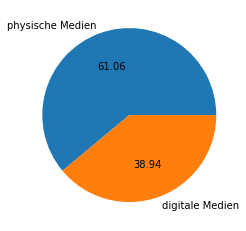

In [88]:
# Ich stelle nun den Prozentsatz der physischen im Vergleich zu den digitalen Ausleihen in einem Kuchendiagramm dar:

items = ['physische Medien', 'digitale Medien']
plt.pie([Physical, Digital], labels = items, autopct='%.2f')
plt.show()

#### Antwort: 38,94 % der ausgeliehenen Medien waren digital.